# Transmon Qubit simulation with Qutip

---

### Prerequisite

- When changing the python class in the lib directory please restart kernel.
- When launching the jupyter notebook please always firstly run this cell.

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import constants
import scipy.sparse.linalg
import scipy.sparse as sparse
import qutip.settings as settings
from tqdm import tqdm
import qutip as qt

qt.settings.atol = 1e-100
qt.settings.auto_tidyup_atol = qt.settings.atol
current_dir = os.getcwd()

# Get the parent folder path
parent_dir = os.path.dirname(current_dir)

# Add the parent folder path to sys.path
sys.path.append(parent_dir)

from lib.qubit import qubit 

# plt.style.use("Solarize_Light2")
thememap = 'viridis'

# Setting up constants
h = constants.h
hbar = constants.hbar
pi = np.pi

# Defining a transmon qubit

ng = 0.5
Ej = 0.1e9
Ct = 150e-15
ncut = 20


# Creation of circuit object
system = qubit(Ej, [Ct], ng, ncut)

system.print_params()

Ej:    0.1 GHz
Ec:    0.5165394486575766 GHz
Cj:    150.0 fF
Ej/Ec : 0.19359605594478382
w_01:    0.09998536221673969 GHz
ng:    0.5


### Energy level simulation of the first three level of the qubit

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 71.93it/s]


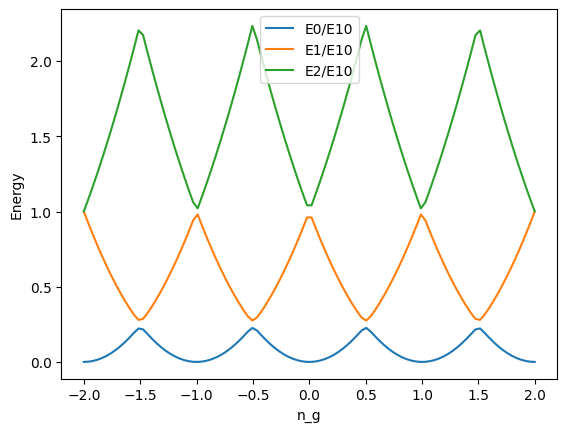

In [4]:
ngs = np.linspace(-2, 2, 100)
E_0, E_1, E_2 = [], [], []

evals, evecs = system.diagonalize_H(update=True)

E10 = evals[1] - evals[0]

for ng in tqdm(ngs):
    system.ng = ng
    
    evals, evecs = system.diagonalize_H(update=True)
    
    E_0.append(evals[0] / E10)
    E_1.append(evals[1] / E10)
    E_2.append(evals[2] / E10)

zero_E = min(E_0)

plt.plot(ngs, [val - zero_E for val in E_0], label='E0/E10')
plt.plot(ngs, [val - zero_E for val in E_1], label='E1/E10')
plt.plot(ngs, [val - zero_E for val in E_2], label='E2/E10')
plt.xlabel('n_g')
plt.ylabel('Energy')
plt.legend()
plt.show()

### Evolution of energy level while going to the transmon regime

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:13<00:00, 71.93it/s]


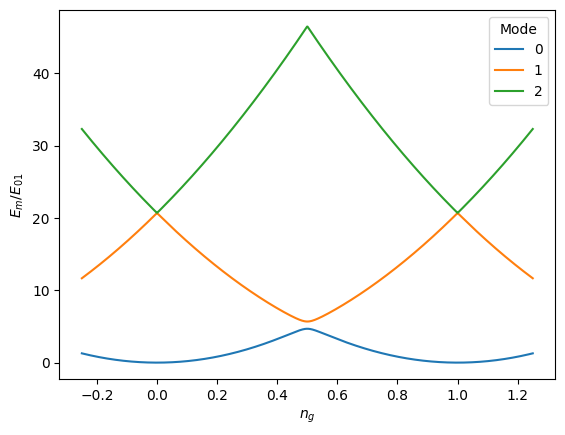

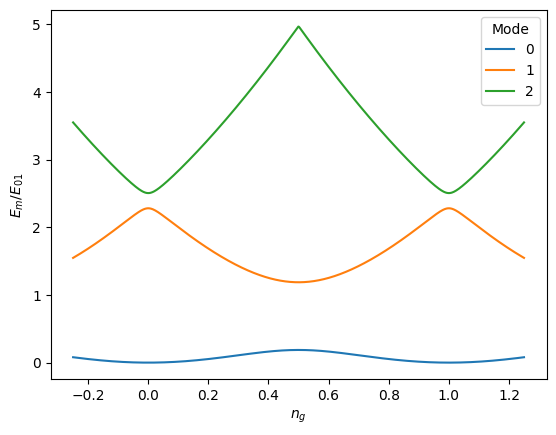

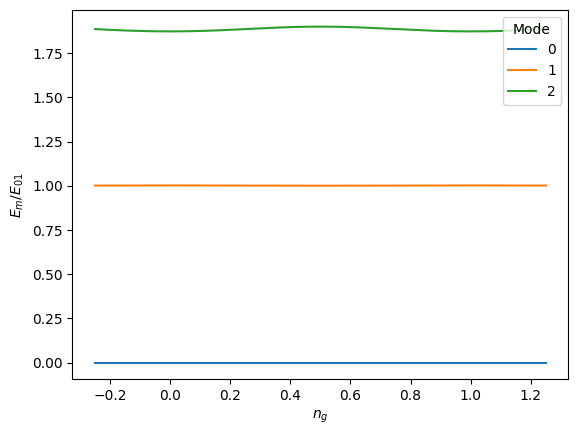

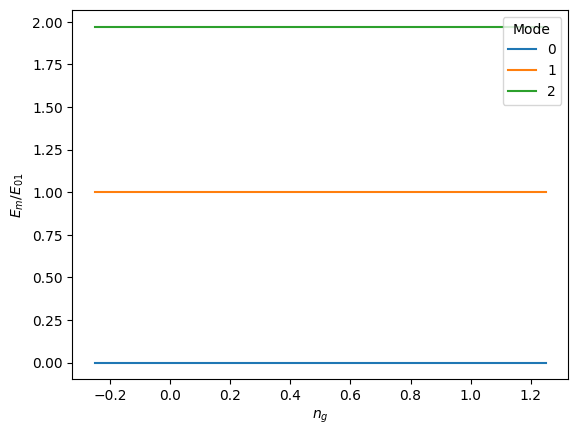

In [5]:
ngs = np.linspace(-0.25, 1.25, 1000)
Ejs = [0.1e9, 1e9, 10e9, 100e9]
E_0, E_1, E_2 = {}, {}, {}


for Ej in Ejs:
    system.Ej = Ej * constants.h
    E_0[Ej], E_1[Ej], E_2[Ej] = [], [], []
    
    system.ng = 0.5
    evals, evecs = system.diagonalize_H(update=True)
    E10 = evals[1] - evals[0]

    for ng in tqdm(ngs):
        system.ng = ng

        evals, evecs = system.diagonalize_H(update=True)

        E_0[Ej].append(evals[0] / E10)
        E_1[Ej].append(evals[1] / E10)
        E_2[Ej].append(evals[2] / E10)

for Ej in Ejs:
    zero_E = min(E_0[Ej])
    plt.plot(ngs, [val - zero_E for val in E_0[Ej]], label='0')
    plt.plot(ngs, [val - zero_E for val in E_1[Ej]], label='1')
    plt.plot(ngs, [val - zero_E for val in E_2[Ej]], label='2')
    plt.xlabel('$n_g$')
    plt.ylabel('$E_m / E_{01}$')
    plt.legend(title='Mode')
    plt.show()